In [1]:
#lbbVIXAnalysis-9
# insert new Yield Curve with the rest of the features
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 2000)
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
from numpy.polynomial.polynomial import polyfit
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

pd.set_option('display.expand_frame_repr', True)

from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### IMPORT TRAINING STEPS ###
#   split training and testing data
from sklearn.model_selection import train_test_split
#   using the pipeline
from sklearn.pipeline import make_pipeline
#   using standardization during cross validation scoring
from sklearn.preprocessing import StandardScaler
#   using GridSearch Cross Validation and folding
from sklearn.model_selection import GridSearchCV

### COMPUTE THE WINNING ALGO METRICS ###
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score #best for classifier models
from sklearn.metrics import confusion_matrix #best for classifier models
from sklearn.metrics import roc_curve, roc_auc_score #best for classifier models Area Under ROC Curve
from sklearn.metrics import adjusted_rand_score #adjust rand index for unsupervised classifications

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

# to Ignore and ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

import os
os.getcwd()


'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks'

In [2]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-cornerstoneproject\\Final')

In [3]:
##Get csv product from VIXANalysis-08A the yieldcurve signals csv, and merge into 
## main vix-02 csv to create a new abt

In [4]:
df2 = pd.read_csv('yieldSignalsC.csv', index_col=0)

In [5]:
df2.head()

%one2Next  SSTMean  STMean  MTMean  LTMean  sig01  sig02  sig03  sig04  \
4252      94.48     3.74    4.84    4.68    4.83      0      0      0      1   
4253      95.84     3.75    4.81    4.66    4.81      0      0      1      0   
4254      95.24     3.73    4.76    4.61    4.76      0      0      1      0   
4255      95.25     3.74    4.81    4.65    4.79      0      0      1      1   
4256      95.87     3.77    4.83    4.66    4.79      0      0      1      1   

      yieldSpread  clusters        Date  
4252         1.09         3  2007-01-02  
4253         1.06         1  2007-01-03  
4254         1.04         1  2007-01-04  
4255         1.05         3  2007-01-05  
4256         1.02         3  2007-01-08

In [6]:
df2['tradeDate'] = df2.Date

In [7]:
df2['tradeDate'] = pd.to_datetime(df2['tradeDate'])

In [8]:
df2['tradeDate'] = df2['tradeDate'].dt.date

In [9]:
del df2['Date']

In [10]:
df2.tail()

%one2Next  SSTMean  STMean  MTMean  LTMean  sig01  sig02  sig03  sig04  \
7663      90.00     0.10    0.15    0.49    1.31      0      0      0      0   
7664      88.89     0.10    0.15    0.47    1.28      0      0      0      0   
7665      77.78     0.10    0.15    0.48    1.31      0      0      0      0   
7666      88.89     0.10    0.13    0.46    1.26      0      0      0      0   
7667      77.78     0.10    0.15    0.46    1.24      0      0      0      0   

      yieldSpread  clusters   tradeDate  
7663         1.21         2  2020-08-17  
7664         1.18         2  2020-08-18  
7665         1.21         2  2020-08-19  
7666         1.16         2  2020-08-20  
7667         1.15         2  2020-08-21

In [11]:
df2.sig01 = df2.sig01.astype(float)
df2.sig02 = df2.sig02.astype(float)
df2.sig03 = df2.sig03.astype(float)
df2.sig04 = df2.sig04.astype(float)

In [12]:
df2.dtypes

%one2Next      float64
SSTMean        float64
STMean         float64
MTMean         float64
LTMean         float64
sig01          float64
sig02          float64
sig03          float64
sig04          float64
yieldSpread    float64
clusters         int64
tradeDate       object
dtype: object

In [13]:
df2 = df2[['tradeDate','%one2Next','SSTMean','STMean','MTMean','LTMean','sig01',
           'sig02','sig03','sig04','yieldSpread','clusters']]

In [14]:
df2

tradeDate  %one2Next  SSTMean  STMean  MTMean  LTMean  sig01  sig02  \
4252  2007-01-02      94.48     3.74    4.84    4.68    4.83   0.00   0.00   
4253  2007-01-03      95.84     3.75    4.81    4.66    4.81   0.00   0.00   
4254  2007-01-04      95.24     3.73    4.76    4.61    4.76   0.00   0.00   
4255  2007-01-05      95.25     3.74    4.81    4.65    4.79   0.00   0.00   
4256  2007-01-08      95.87     3.77    4.83    4.66    4.79   0.00   0.00   
...          ...        ...      ...     ...     ...     ...    ...    ...   
7663  2020-08-17      90.00     0.10    0.15    0.49    1.31   0.00   0.00   
7664  2020-08-18      88.89     0.10    0.15    0.47    1.28   0.00   0.00   
7665  2020-08-19      77.78     0.10    0.15    0.48    1.31   0.00   0.00   
7666  2020-08-20      88.89     0.10    0.13    0.46    1.26   0.00   0.00   
7667  2020-08-21      77.78     0.10    0.15    0.46    1.24   0.00   0.00   

      sig03  sig04  yieldSpread  clusters  
4252   0.00   1.00         1.09         3  
4253   1.00   0.00         1.06         1  
4254   1.00   0.00         1.04         1  
4255   1.00   1.00         1.05         3  
4256   1.00   1.00         1.02         3  
...     ...    ...          ...       ...  
7663   0.00   0.00         1.21         2  
7664   0.00   0.00         1.18         2  
7665   0.00   0.00         1.21         2  
7666   0.00   0.00         1.16         2  
7667   0.00   0.00         1.15         2  

[3414 rows x 12 columns]

In [15]:
df2.set_index('tradeDate')

%one2Next  SSTMean  STMean  MTMean  LTMean  sig01  sig02  sig03  \
tradeDate                                                                     
2007-01-02      94.48     3.74    4.84    4.68    4.83   0.00   0.00   0.00   
2007-01-03      95.84     3.75    4.81    4.66    4.81   0.00   0.00   1.00   
2007-01-04      95.24     3.73    4.76    4.61    4.76   0.00   0.00   1.00   
2007-01-05      95.25     3.74    4.81    4.65    4.79   0.00   0.00   1.00   
2007-01-08      95.87     3.77    4.83    4.66    4.79   0.00   0.00   1.00   
...               ...      ...     ...     ...     ...    ...    ...    ...   
2020-08-17      90.00     0.10    0.15    0.49    1.31   0.00   0.00   0.00   
2020-08-18      88.89     0.10    0.15    0.47    1.28   0.00   0.00   0.00   
2020-08-19      77.78     0.10    0.15    0.48    1.31   0.00   0.00   0.00   
2020-08-20      88.89     0.10    0.13    0.46    1.26   0.00   0.00   0.00   
2020-08-21      77.78     0.10    0.15    0.46    1.24   0.00   0.00   0.00   

            sig04  yieldSpread  clusters  
tradeDate                                 
2007-01-02   1.00         1.09         3  
2007-01-03   0.00         1.06         1  
2007-01-04   0.00         1.04         1  
2007-01-05   1.00         1.05         3  
2007-01-08   1.00         1.02         3  
...           ...          ...       ...  
2020-08-17   0.00         1.21         2  
2020-08-18   0.00         1.18         2  
2020-08-19   0.00         1.21         2  
2020-08-20   0.00         1.16         2  
2020-08-21   0.00         1.15         2  

[3414 rows x 11 columns]

In [16]:
df2.dtypes

tradeDate       object
%one2Next      float64
SSTMean        float64
STMean         float64
MTMean         float64
LTMean         float64
sig01          float64
sig02          float64
sig03          float64
sig04          float64
yieldSpread    float64
clusters         int64
dtype: object

In [17]:
df = pd.read_csv('vix-02.csv', index_col=0)

In [18]:
df.tail()

tradeDate     1     2     3     4     5     6     7     8     9  \
3429  2020-08-14 23.27 26.98 30.05 28.77 28.30 28.68 28.32 27.95 27.57   
3430  2020-08-17 21.77 25.82 29.12 28.12 27.38 27.88 27.77 27.40 26.15   
3431  2020-08-18 21.77 25.48 28.82 28.23 27.48 27.77 27.68 27.38 25.40   
3432  2020-08-19 21.71 26.23 29.38 28.68 27.90 28.12 28.12 27.80 25.35   
3433  2020-08-20 25.88 29.23 28.57 27.82 27.98 27.98 27.62 27.38  0.00   

      diffSetCl1  diffSetCl2  diffSetCl3  diffSetCl4  diffSetCl5  diffSetCl6  \
3429       -0.02        0.04       -0.08       -0.08        0.05        0.12   
3430       -0.12       -0.11       -0.20       -0.27       -0.23       -0.14   
3431       -0.18       -0.07       -0.03       -0.02        0.05        0.02   
3432       -0.09       -0.02       -0.02       -0.00       -0.02       -0.02   
3433       -0.00        0.01        0.07        0.02        0.04        0.03   

      diffSetCl7  diffSetCl8  diffSetCl9  rngDayHL1  rngDayHL2  rngDayHL3  \
3429        0.12        0.05       27.57       1.35       1.05       0.82   
3430       -0.10       -0.10       26.15       1.43       1.05       0.92   
3431        0.03       -0.02       25.40       1.16       0.85       0.78   
3432       -0.02        0.00       -0.15       0.35       1.07       0.83   
3433        0.02        0.32        0.00       1.66       1.21       0.95   

      rngDayHL4  rngDayHL5  rngDayHL6  rngDayHL7  rngDayHL8  rngDayHL9  \
3429       0.68       0.60       0.55       0.50       0.45      -0.10   
3430       0.79       0.79       0.70       0.45       0.43      -4.75   
3431       0.61       0.55       0.60       0.50       0.40      -2.60   
3432       0.63       0.65       0.63       0.64       0.54       0.15   
3433       0.87       0.95       0.85       0.93       0.25       0.00   

      rngDayOC1  rngDayOC2  rngDayOC3  rngDayOC4  rngDayOC5  rngDayOC6  \
3429       0.09       0.14       0.11       0.20       0.40       0.23   
3430      -1.25      -0.87      -0.63      -0.30      -0.46      -0.45   
3431       0.14      -0.30      -0.42      -0.12       0.02      -0.12   
3432      -0.15       0.70       0.55       0.46       0.52       0.35   
3433      -0.47      -0.18      -0.20      -0.12      -0.18      -0.26   

      rngDayOC7  rngDayOC8  rngDayOC9  SettlMax  SettlMin  diffMaxMin  \
3429       0.21       0.10       0.00     30.05     23.27        6.78   
3430      -0.28      -0.20       0.00     29.12     21.77        7.35   
3431      -0.12      -0.12       0.00     28.82     21.77        7.05   
3432       0.50       0.44       0.00     29.38     21.71        7.66   
3433       0.10       0.00       0.00     29.23     25.88        3.35   

      sig8over9  sig1over2  rngSlope6  avg6  rngSlope7  rngSlope9  nTerm  \
3429       1.00       0.00       5.40 27.68       5.05       4.30   0.16   
3430       1.00       0.00       6.10 26.68       6.00       4.38   0.19   
3431       1.00       0.00       6.00 26.59       5.90       3.62   0.17   
3432       1.00       0.00       6.41 27.00       6.41       3.64   0.21   
3433       0.00       0.00       2.10 27.91       1.75       0.00   0.13   

      fTerm  curve  nTerm2  fTerm2  nTerm2b  fTerm2b  curve2b  nTerm3  fTerm3  \
3429  -0.02   0.06    0.11   -0.01     0.10     0.04     2.21    0.14   -0.02   
3430  -0.01   0.07    0.13    0.00     0.11     0.04     2.53    0.16   -0.01   
3431  -0.02   0.06    0.13   -0.00     0.12     0.04     2.63    0.15   -0.02   
3432  -0.02   0.07    0.12   -0.00     0.11     0.04     2.36    0.17   -0.02   
3433  -0.01   0.05   -0.02   -0.02    -0.02     0.04    -1.93    0.11   -0.01   

      curve3  SPX_Close  VIX_Close  pctChgSPX  pctChgVIX  FXI_Close  \
3429    5.05   3,372.85      22.05      -0.02      -0.36      43.04   
3430    5.59   3,381.99      21.35       0.27      -3.17      43.84   
3431    5.45   3,389.78      21.51       0.23       0.75      44.01   
3432    6.33   3,374.85      22.54      -0.44       4.79     

In [19]:
df['tradeDate'] = pd.to_datetime(df['tradeDate'])
df['tradeDate'] = df['tradeDate'].dt.date

In [20]:
df.head()

tradeDate     1     2     3     4     5     6    7     8    9  diffSetCl1  \
0  2007-01-03 12.30 13.11 14.06 14.53 15.25 15.48 0.00 15.92 0.00       12.30   
1  2007-01-04 12.11 13.16 13.66 14.36 15.12 15.45 0.00 15.90 0.00       -0.04   
2  2007-01-05 12.38 13.48 13.83 14.39 15.20 15.50 0.00 15.94 0.00       -0.01   
3  2007-01-08 12.25 13.33 13.93 14.34 14.98 15.46 0.00 15.88 0.00       -0.02   
4  2007-01-09 12.34 13.21 13.88 14.36 14.88 15.35 0.00 15.89 0.00       -0.03   

   diffSetCl2  diffSetCl3  diffSetCl4  diffSetCl5  diffSetCl6  diffSetCl7  \
0       13.11       14.06       14.53       15.25       15.48        0.00   
1       -0.03        0.05        0.06       -0.03       15.45        0.00   
2       -0.04       -0.02       14.39        0.00       15.50        0.00   
3       -0.07       -0.10       -0.10       -0.02       15.46        0.00   
4       -0.02        0.06        0.02       -0.02       15.35        0.00   

   diffSetCl8  diffSetCl9  rngDayHL1  rngDayHL2  rngDayHL3  rngDayHL4  \
0       15.92        0.00       0.00       0.00       0.00       0.00   
1       -0.05        0.00       0.39       0.26       0.24       0.10   
2       -0.01        0.00       0.25       0.45       0.25       0.00   
3       -0.02        0.00       0.35       0.18       0.14       0.04   
4       -0.05        0.00       0.40       0.30       0.19       0.11   

   rngDayHL5  rngDayHL6  rngDayHL7  rngDayHL8  rngDayHL9  rngDayOC1  \
0       0.00       0.00       0.00       0.00       0.00       0.00   
1       0.12       0.00       0.00       0.02       0.00      -0.12   
2       0.13       0.00       0.00       0.05       0.00       0.20   
3       0.30       0.00       0.00       0.19       0.00      -0.15   
4       0.10       0.00       0.00       0.11       0.00       0.09   

   rngDayOC2  rngDayOC3  rngDayOC4  rngDayOC5  rngDayOC6  rngDayOC7  \
0       0.00       0.00       0.00       0.00       0.00       0.00   
1      -0.01      -0.23      -0.10       0.00       0.00       0.00   
2       0.25       0.14       0.00      -0.04       0.00       0.00   
3      -0.15       0.12       0.04      -0.30       0.00       0.00   
4      -0.07      -0.17      -0.09       0.00       0.00       0.00   

   rngDayOC8  rngDayOC9  SettlMax  SettlMin  diffMaxMin  sig8over9  sig1over2  \
0       0.00       0.00     15.92     12.30        3.62       0.00       0.00   
1       0.00       0.00     15.90     12.11        3.79       0.00       0.00   
2      -0.02       0.00     15.94     12.38        3.56       0.00       0.00   
3      -0.12       0.00     15.88     12.25        3.63       0.00       0.00   
4      -0.02       0.00     15.89     12.34        3.55       0.00       0.00   

   rngSlope6  avg6  rngSlope7  rngSlope9  nTerm  fTerm  curve  nTerm2  fTerm2  \
0       3.18 14.12       0.00       0.00   0.07   0.00   0.02    0.07    0.04   
1       3.34 13.98       0.00       0.00   0.09   0.00   0.03    0.04    0.05   
2       3.12 14.13       0.00       0.00   0.09   0.00   0.03    0.03    0.05   
3       3.21 14.05       0.00       0.00   0.09   0.00   0.03    0.05    0.06   
4       3.01 14.00       0.00       0.00   0.07   0.00   0.02    0.05    0.07   

   nTerm2b  fTerm2b  curve2b  nTerm3  fTerm3  curve3  SPX_Close  VIX_Close  \
0     0.07     0.07     0.07    0.06    0.00    2.04   1,416.60      12.04   
1     0.04     0.07    -0.97    0.08    0.00    2.63   1,418.34      11.51   
2     0.03     0.07    -1.34    0.08    0.00    2.69   1,409.71      12.14   
3     0.04     0.07    -0.78    0.08    0.00    2.67   1,412.84      12.00   
4     0.05     0.07    -0.62    0.07    0.00    2.17   1,412.11      11.91   

   pctChgSPX  pctChgVIX  FXI_Close  pctChgFXI  curve3P  curve3N  \
0       0.00       0.00      38.80       4.44        1        0   
1       0.12      -4.40      37.43      -3.52        1        0   
2      -0.61       5.47      35.32      -5.65        1        0   
3       0.22      -1.15      36.35       2.93     

In [21]:
df.set_index('tradeDate')

1     2     3     4     5     6     7     8     9  diffSetCl1  \
tradeDate                                                                      
2007-01-03 12.30 13.11 14.06 14.53 15.25 15.48  0.00 15.92  0.00       12.30   
2007-01-04 12.11 13.16 13.66 14.36 15.12 15.45  0.00 15.90  0.00       -0.04   
2007-01-05 12.38 13.48 13.83 14.39 15.20 15.50  0.00 15.94  0.00       -0.01   
2007-01-08 12.25 13.33 13.93 14.34 14.98 15.46  0.00 15.88  0.00       -0.02   
2007-01-09 12.34 13.21 13.88 14.36 14.88 15.35  0.00 15.89  0.00       -0.03   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...         ...   
2020-08-14 23.27 26.98 30.05 28.77 28.30 28.68 28.32 27.95 27.57       -0.02   
2020-08-17 21.77 25.82 29.12 28.12 27.38 27.88 27.77 27.40 26.15       -0.12   
2020-08-18 21.77 25.48 28.82 28.23 27.48 27.77 27.68 27.38 25.40       -0.18   
2020-08-19 21.71 26.23 29.38 28.68 27.90 28.12 28.12 27.80 25.35       -0.09   
2020-08-20 25.88 29.23 28.57 27.82 27.98 27.98 27.62 27.38  0.00       -0.00   

            diffSetCl2  diffSetCl3  diffSetCl4  diffSetCl5  diffSetCl6  \
tradeDate                                                                
2007-01-03       13.11       14.06       14.53       15.25       15.48   
2007-01-04       -0.03        0.05        0.06       -0.03       15.45   
2007-01-05       -0.04       -0.02       14.39        0.00       15.50   
2007-01-08       -0.07       -0.10       -0.10       -0.02       15.46   
2007-01-09       -0.02        0.06        0.02       -0.02       15.35   
...                ...         ...         ...         ...         ...   
2020-08-14        0.04       -0.08       -0.08        0.05        0.12   
2020-08-17       -0.11       -0.20       -0.27       -0.23       -0.14   
2020-08-18       -0.07       -0.03       -0.02        0.05        0.02   
2020-08-19       -0.02       -0.02       -0.00       -0.02       -0.02   
2020-08-20        0.01        0.07        0.02        0.04        0.03   

            diffSetCl7  diffSetCl8  diffSetCl9  rngDayHL1  rngDayHL2  \
tradeDate                                                              
2007-01-03        0.00       15.92        0.00       0.00       0.00   
2007-01-04        0.00       -0.05        0.00       0.39       0.26   
2007-01-05        0.00       -0.01        0.00       0.25       0.45   
2007-01-08        0.00       -0.02        0.00       0.35       0.18   
2007-01-09        0.00       -0.05        0.00       0.40       0.30   
...                ...         ...         ...        ...        ...   
2020-08-14        0.12        0.05       27.57       1.35       1.05   
2020-08-17       -0.10       -0.10       26.15       1.43       1.05   
2020-08-18        0.03       -0.02       25.40       1.16       0.85   
2020-08-19       -0.02        0.00       -0.15       0.35       1.07   
2020-08-20        0.02        0.32        0.00       1.66       1.21   

            rngDayHL3  rngDayHL4  rngDayHL5  rngDayHL6  rngDayHL7  rngDayHL8  \
tradeDate                                                                      
2007-01-03       0.00       0.00       0.00       0.00       0.00       0.00   
2007-01-04       0.24       0.10       0.12       0.00       0.00       0.02   
2007-01-05       0.25       0.00       0.13       0.00       0.00       0.05   
2007-01-08       0.14       0.04       0.30       0.00       0.00       0.19   
2007-01-09       0.19       0.11       0.10       0.00       0.00       0.11   
...               ...        ...        ...        ...        ...        ...   
2020-08-14       0.82       0.68       0.60       0.55       0.50       0.45   
2020-08-17       0.92       0.79       0.79       0.70       0.45       0.43   
2020-08-18       0.78       0.61       0.55       0.60       0.50       0.40   
2020-08-19       0.83       0.63       0.65       0.63       0.64       0.54   
2020-08-20       0.95       0.87       0.95       0.85       0.93       0.25   

            rngDayHL9  rngDayOC1 

In [22]:
df2.dtypes

tradeDate       object
%one2Next      float64
SSTMean        float64
STMean         float64
MTMean         float64
LTMean         float64
sig01          float64
sig02          float64
sig03          float64
sig04          float64
yieldSpread    float64
clusters         int64
dtype: object

In [23]:
df_df7Merge = pd.merge(df, df2, on='tradeDate', how = 'outer')

In [24]:
df_df7Merge.tail(20)

tradeDate     1     2     3     4     5     6     7     8     9  \
3421  2020-08-04 25.88 28.43 30.98 29.12 28.02 28.48 28.07 27.95 29.43   
3422  2020-08-05 25.32 28.12 30.77 29.02 27.98 28.38 27.98 27.77 29.82   
3423  2020-08-06 24.88 27.88 30.43 28.85 27.88 28.27 27.88 27.65 27.50   
3424  2020-08-07 24.62 27.82 30.52 28.98 27.98 28.43 28.02 27.77 26.85   
3425  2020-08-10 23.77 27.12 30.02 28.57 27.62 28.07 27.73 27.45 27.48   
3426  2020-08-11 24.93 28.18 30.98 29.27 28.23 28.62 28.23 27.98 27.00   
3427  2020-08-12 23.27 26.88 30.02 28.52 27.68 28.07 27.73 27.45 27.60   
3428  2020-08-13 23.23 26.82 30.02 28.57 27.82 28.27 27.93 27.68 27.32   
3429  2020-08-14 23.27 26.98 30.05 28.77 28.30 28.68 28.32 27.95 27.57   
3430  2020-08-17 21.77 25.82 29.12 28.12 27.38 27.88 27.77 27.40 26.15   
3431  2020-08-18 21.77 25.48 28.82 28.23 27.48 27.77 27.68 27.38 25.40   
3432  2020-08-19 21.71 26.23 29.38 28.68 27.90 28.12 28.12 27.80 25.35   
3433  2020-08-20 25.88 29.23 28.57 27.82 27.98 27.98 27.62 27.38  0.00   
3434  2007-01-02   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3435  2007-04-06   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3436  2010-04-02   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3437  2012-04-06   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3438  2012-10-29   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3439  2015-04-03   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3440  2020-08-21   nan   nan   nan   nan   nan   nan   nan   nan   nan   

      diffSetCl1  diffSetCl2  diffSetCl3  diffSetCl4  diffSetCl5  diffSetCl6  \
3421        0.02       -0.02       -0.06       -0.11       -0.03       -0.02   
3422        0.07        0.05        0.06        0.02        0.02       -0.00   
3423        0.02        0.12       -0.00       -0.05       -0.05       -0.07   
3424        0.02       -0.02        0.02        0.02        0.02        0.03   
3425       -0.08        0.02        0.00       -0.03       -0.02       -0.02   
3426        0.25        0.28        0.27        0.25        0.18        0.18   
3427       -0.08       -0.07       -0.02       -0.04       -0.00       -0.07   
3428        0.03        0.00       -0.03       -0.07        0.02        0.02   
3429       -0.02        0.04       -0.08       -0.08        0.05        0.12   
3430       -0.12       -0.11       -0.20       -0.27       -0.23       -0.14   
3431       -0.18       -0.07       -0.03       -0.02        0.05        0.02   
3432       -0.09       -0.02       -0.02       -0.00       -0.02       -0.02   
3433       -0.00        0.01        0.07        0.02        0.04        0.03   
3434         nan         nan         nan         nan         nan         nan   
3435         nan         nan         nan         nan         nan         nan   
3436         nan         nan         nan         nan         nan         nan   
3437         nan         nan         nan         nan         nan         nan   
3438         nan         nan         nan         nan         nan         nan   
3439         nan         nan         nan         nan         nan         nan   
3440         nan         nan         nan         nan         nan         nan   

      diffSetCl7  diffSetCl8  diffSetCl9  rngDayHL1  rngDayHL2  rngDayHL3  \
3421        0.02        0.02       29.43       1.10       1.10       0.98   
3422        0.04       -0.05       29.82       0.85       0.64       0.51   
3423       -0.09       -0.04        0.01       1.05       0.85       0.87   
3424        0.02        0.00       26.85       1.36       0.86       0.68   
3425       -0.02       -0.01       27.48       1.25       1.01       0.75   
3426        0.19        0.03       27.00       2.75       2.16       1.87   
3427       -0.02       -0.05        0.20       2.00       1.60       1.32   
3428        0.00        0.05       -0.12       1.05       0.95       0.81   
3429        0.12        0.05       27.57       1.35       1.05       0.82   
3

In [25]:
df = df_df7Merge.copy()

In [26]:
df.tail(10)

tradeDate     1     2     3     4     5     6     7     8     9  \
3431  2020-08-18 21.77 25.48 28.82 28.23 27.48 27.77 27.68 27.38 25.40   
3432  2020-08-19 21.71 26.23 29.38 28.68 27.90 28.12 28.12 27.80 25.35   
3433  2020-08-20 25.88 29.23 28.57 27.82 27.98 27.98 27.62 27.38  0.00   
3434  2007-01-02   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3435  2007-04-06   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3436  2010-04-02   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3437  2012-04-06   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3438  2012-10-29   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3439  2015-04-03   nan   nan   nan   nan   nan   nan   nan   nan   nan   
3440  2020-08-21   nan   nan   nan   nan   nan   nan   nan   nan   nan   

      diffSetCl1  diffSetCl2  diffSetCl3  diffSetCl4  diffSetCl5  diffSetCl6  \
3431       -0.18       -0.07       -0.03       -0.02        0.05        0.02   
3432       -0.09       -0.02       -0.02       -0.00       -0.02       -0.02   
3433       -0.00        0.01        0.07        0.02        0.04        0.03   
3434         nan         nan         nan         nan         nan         nan   
3435         nan         nan         nan         nan         nan         nan   
3436         nan         nan         nan         nan         nan         nan   
3437         nan         nan         nan         nan         nan         nan   
3438         nan         nan         nan         nan         nan         nan   
3439         nan         nan         nan         nan         nan         nan   
3440         nan         nan         nan         nan         nan         nan   

      diffSetCl7  diffSetCl8  diffSetCl9  rngDayHL1  rngDayHL2  rngDayHL3  \
3431        0.03       -0.02       25.40       1.16       0.85       0.78   
3432       -0.02        0.00       -0.15       0.35       1.07       0.83   
3433        0.02        0.32        0.00       1.66       1.21       0.95   
3434         nan         nan         nan        nan        nan        nan   
3435         nan         nan         nan        nan        nan        nan   
3436         nan         nan         nan        nan        nan        nan   
3437         nan         nan         nan        nan        nan        nan   
3438         nan         nan         nan        nan        nan        nan   
3439         nan         nan         nan        nan        nan        nan   
3440         nan         nan         nan        nan        nan        nan   

      rngDayHL4  rngDayHL5  rngDayHL6  rngDayHL7  rngDayHL8  rngDayHL9  \
3431       0.61       0.55       0.60       0.50       0.40      -2.60   
3432       0.63       0.65       0.63       0.64       0.54       0.15   
3433       0.87       0.95       0.85       0.93       0.25       0.00   
3434        nan        nan        nan        nan        nan        nan   
3435        nan        nan        nan        nan        nan        nan   
3436        nan        nan        nan        nan        nan        nan   
3437        nan        nan        nan        nan        nan        nan   
3438        nan        nan        nan        nan        nan        nan   
3439        nan        nan        nan        nan        nan        nan   
3440        nan        nan        nan        nan        nan        nan   

      rngDayOC1  rngDayOC2  rngDayOC3  rngDayOC4  rngDayOC5  rngDayOC6  \
3431       0.14      -0.30      -0.42      -0.12       0.02      -0.12   
3432      -0.15       0.70       0.55       0.46       0.52       0.35   
3433      -0.47      -0.18      -0.20      -0.12      -0.18      -0.26   
3434        nan        nan        nan        nan        nan        nan   
3435        nan        nan        nan        nan        nan        nan   
3436        nan        nan        nan        nan        nan        nan   
3437        nan        nan        nan        nan        nan        nan   
3438        nan        nan        nan        nan        

In [27]:
df.to_csv('vix-04.csv') # includes all rows before cleanup for algos

In [28]:
for columns in ['%one2Next','SSTMean','STMean','MTMean','LTMean','sig01','sig02','sig03','sig04','yieldSpread','clusters']:
    df.loc[:,columns] = df.loc[:,columns].ffill()

In [29]:
df.drop(df.index[[3434, 3435, 3436, 3437, 3438, 3439, 3440, 3003]], inplace=True) #drop those rows where we have yield curve data, but the 
# market was closed (don't know what happened Oct 29, 2012 -- but the SPX has no data)

In [30]:
df.tail(1000)

tradeDate     1     2     3     4     5     6     7     8     9  \
2433  2016-08-31 14.57 16.73 17.77 18.18 19.32 19.62 19.98 20.48 20.68   
2434  2016-09-01 14.57 16.68 17.73 18.12 19.32 19.68 20.02 20.55 20.68   
2435  2016-09-02 13.93 16.38 17.57 18.07 19.23 19.57 19.90 20.45 20.60   
2436  2016-09-06 13.38 15.88 17.18 17.73 18.93 19.27 19.68 20.27 20.25   
2437  2016-09-07 13.22 15.78 17.12 17.68 18.88 19.27 19.68 20.25 20.38   
2438  2016-09-08 13.38 15.93 17.27 17.82 19.02 19.43 19.82 20.35 20.40   
2439  2016-09-09 16.48 17.88 18.80 19.07 20.15 20.43 20.65 21.23 21.30   
2440  2016-09-12 15.32 16.93 17.98 18.48 19.62 19.98 20.32 20.80 20.88   
2441  2016-09-13 17.77 18.32 18.82 18.98 20.07 20.38 20.62 21.20 21.35   
2442  2016-09-14 18.38 18.88 19.27 19.43 20.48 20.73 20.98 21.40 21.55   
2443  2016-09-15 17.07 18.23 18.82 19.07 20.12 20.40 20.68 21.12 21.20   
2444  2016-09-16 16.02 17.52 18.27 18.73 19.82 20.12 20.43 20.93 21.05   
2445  2016-09-19 15.68 17.12 18.02 18.52 19.62 19.93 20.23 20.65 20.82   
2446  2016-09-20 15.88 17.43 18.23 18.73 19.77 20.07 20.32 20.75 21.00   
2447  2016-09-21 14.92 16.07 17.48 18.12 19.27 19.62 19.98 20.43 20.43   
2448  2016-09-22 15.32 16.88 17.62 18.88 19.27 19.57 20.02 20.10  0.00   
2449  2016-09-23 15.57 17.07 17.73 18.93 19.35 19.68 20.18 20.23  0.00   
2450  2016-09-26 16.27 17.38 17.93 19.02 19.48 19.77 20.30 20.43 20.45   
2451  2016-09-27 15.53 16.88 17.48 18.62 19.10 19.48 19.98 20.10 20.25   
2452  2016-09-28 15.22 16.73 17.30 18.50 18.98 19.35 19.93 20.00 20.20   
2453  2016-09-29 15.93 17.02 17.48 18.70 19.12 19.48 19.98 20.12 20.30   
2454  2016-09-30 15.78 16.95 17.45 18.50 19.05 19.40 19.98 20.05 20.30   
2455  2016-10-03 15.47 16.77 17.23 18.38 18.88 19.27 19.80 19.95 20.30   
2456  2016-10-04 15.32 16.62 17.02 18.18 18.62 19.02 19.57 19.75 19.98   
2457  2016-10-05 15.12 16.68 17.18 18.32 18.77 19.18 19.73 19.88 20.02   
2458  2016-10-06 14.97 16.52 17.07 18.27 18.73 19.12 19.62 19.77 19.98   
2459  2016-10-07 15.32 16.73 17.27 18.43 18.85 19.18 19.70 19.85 20.12   
2460  2016-10-10 14.68 16.32 16.93 18.12 18.57 18.93 19.45 19.65 19.90   
2461  2016-10-11 15.82 16.98 17.43 18.52 18.93 19.23 19.73 19.90 20.05   
2462  2016-10-12 16.32 17.23 17.62 18.73 19.07 19.43 19.93 20.07 20.05   
2463  2016-10-13 17.02 17.52 17.82 18.93 19.30 19.57 20.07 20.20 20.35   
2464  2016-10-14 16.62 17.32 17.62 18.77 19.18 19.48 20.00 20.15 20.23   
2465  2016-10-17 16.52 17.12 17.43 18.57 19.02 19.32 19.82 20.02 20.18   
2466  2016-10-18 15.68 16.62 17.12 18.38 18.88 19.23 19.73 19.93 20.07   
2467  2016-10-19 14.56 16.07 16.82 18.12 18.60 19.00 19.52 19.77 19.90   
2468  2016-10-20 15.78 16.68 18.02 18.57 19.02 19.52 19.82 20.00  0.00   
2469  2016-10-21 15.57 16.52 17.88 18.43 18.88 19.43 19.68 19.88  0.00   
2470  2016-10-24 14.93 16.07 17.48 18.02 18.52 19.07 19.38 19.57 19.93   
2471  2016-10-25 15.22 16.23 17.57 18.07 18.52 19.05 19.38 19.52 19.73   
2472  2016-10-26 15.62 16.48 17.82 18.27 18.68 19.23 19.52 19.68 19.95   
2473  2016-10-27 16.07 16.88 18.18 18.62 18.98 19.48 19.68 19.82 20.00   
2474  2016-10-28 16.62 17.10 18.32 18.73 19.02 19.48 19.73 19.82 20.18   
2475  2016-10-31 17.23 17.43 18.48 18.77 19.02 19.48 19.68 19.82 20.18   
2476  2016-11-01 17.82 17.88 18.88 19.12 19.32 19.73 19.93 20.02 20.35   
2477  2016-11-02 18.52 18.23 19.12 19.27 19.45 19.82 20.02 20.12 20.45   
2478  2016-11-03 19.77 19.02 19.77 19.93 20.02 20.32 20.48 20.57 20.75   
2479  2016-11-04 19.32 18.98 19.73 19.88 19.93 20.23 20.32 20.43 20.60   
2480  2016-11-07 16.02 16.57 17.68 18.12 18.40 18.85 19.02 19.27 19.65   
2481  2016-11-08 15.97 16.57 17.73 18.18 18.52 18.98 19.23 19.38 19.65   
2482  2016-11-09 14.88 15.72 17.02 17.57 18.00 18.50 18.82 19.00 19.48   
2483  2016-11-10 15.32 16.27 17.38 17.93 18.38 18.88 19.12 19.38 19.80   
2484  2016-11-11 14.93 16.12 17.32 17.93 18.32 18.82 19.12 19.30 19.85   
2485  2016-11-14 14.47 15.97 17.27 17.93 18.38 18.93 19.18 19.43 19.88   
2486  2016-

In [31]:
## to find any values kMeans says is inf
df.iloc[df.values==np.inf] #then delete them..
#df2.drop(df2[df2.index==[2205]], inplace=True)
#df2 = df2.drop(df2.iloc[df2.values==np.inf], inplace=True)
#indexNames = df2[ (df2['%one2Next'] = np.inf) & (['Country'] == 'India') ].index

Empty DataFrame
Columns: [tradeDate, 1, 2, 3, 4, 5, 6, 7, 8, 9, diffSetCl1, diffSetCl2, diffSetCl3, diffSetCl4, diffSetCl5, diffSetCl6, diffSetCl7, diffSetCl8, diffSetCl9, rngDayHL1, rngDayHL2, rngDayHL3, rngDayHL4, rngDayHL5, rngDayHL6, rngDayHL7, rngDayHL8, rngDayHL9, rngDayOC1, rngDayOC2, rngDayOC3, rngDayOC4, rngDayOC5, rngDayOC6, rngDayOC7, rngDayOC8, rngDayOC9, SettlMax, SettlMin, diffMaxMin, sig8over9, sig1over2, rngSlope6, avg6, rngSlope7, rngSlope9, nTerm, fTerm, curve, nTerm2, fTerm2, nTerm2b, fTerm2b, curve2b, nTerm3, fTerm3, curve3, SPX_Close, VIX_Close, pctChgSPX, pctChgVIX, FXI_Close, pctChgFXI, curve3P, curve3N, curve3ChgState, SPXcumPChg, curve2b3, problemsLB, binnedAvg6, binnedRng6, %one2Next, SSTMean, STMean, MTMean, LTMean, sig01, sig02, sig03, sig04, yieldSpread, clusters]
Index: []

In [32]:
df.head(200)


tradeDate     1     2     3     4     5     6     7     8     9  \
0    2007-01-03 12.30 13.11 14.06 14.53 15.25 15.48  0.00 15.92  0.00   
1    2007-01-04 12.11 13.16 13.66 14.36 15.12 15.45  0.00 15.90  0.00   
2    2007-01-05 12.38 13.48 13.83 14.39 15.20 15.50  0.00 15.94  0.00   
3    2007-01-08 12.25 13.33 13.93 14.34 14.98 15.46  0.00 15.88  0.00   
4    2007-01-09 12.34 13.21 13.88 14.36 14.88 15.35  0.00 15.89  0.00   
5    2007-01-10 11.90 13.16 13.90 14.32 14.79 15.30  0.00 15.78  0.00   
6    2007-01-11 10.98 12.28 13.44 14.02 14.71 15.04  0.00 15.63  0.00   
7    2007-01-12 10.66 12.08 13.18 13.82 14.45 14.86  0.00 15.39  0.00   
8    2007-01-16 10.59 11.90 12.91 13.57 14.44 14.88  0.00 15.39  0.00   
9    2007-01-17 11.91 12.90 13.57 14.31 14.78  0.00 15.28  0.00  0.00   
10   2007-01-18 12.06 12.90 13.47 14.04 14.69  0.00 15.12  0.00  0.00   
11   2007-01-19 11.69 12.78 13.32 13.99 14.54  0.00 15.09  0.00  0.00   
12   2007-01-22 11.85 12.88 13.35 14.06 14.54 14.74 15.04  0.00  0.00   
13   2007-01-23 11.47 12.58 13.33 13.90 14.33 14.66 14.88  0.00  0.00   
14   2007-01-24 11.32 12.51 13.28 13.75 14.15 14.35 14.82  0.00  0.00   
15   2007-01-25 11.83 12.78 13.45 13.91 14.21 14.41 14.78  0.00  0.00   
16   2007-01-26 11.88 12.78 13.47 13.90 14.20 14.40 14.77  0.00  0.00   
17   2007-01-29 11.81 12.81 13.45 13.90 14.21 14.40 14.79  0.00  0.00   
18   2007-01-30 11.60 12.64 13.35 13.78 14.14 14.41 14.78  0.00  0.00   
19   2007-01-31 11.51 12.35 13.17 13.76 14.06 14.33 14.68  0.00  0.00   
20   2007-02-01 11.28 12.27 13.08 13.64 14.01 14.31 14.62  0.00  0.00   
21   2007-02-02 11.20 12.24 13.08 13.66 14.05 14.26 14.65  0.00  0.00   
22   2007-02-05 11.16 12.28 13.05 13.71 14.05 14.30 14.66  0.00  0.00   
23   2007-02-06 11.16 12.03 12.83 13.48 13.88 14.22 14.58  0.00  0.00   
24   2007-02-07 10.95 11.89 12.83 13.49 13.82 14.16 14.56  0.00  0.00   
25   2007-02-08 11.01 11.97 12.83 13.55 13.82 14.13 14.60  0.00  0.00   
26   2007-02-09 11.23 12.20 13.17 13.74 14.14 14.35 14.70  0.00  0.00   
27   2007-02-12 11.36 12.42 13.39 13.95 14.22 14.52 14.77  0.00  0.00   
28   2007-02-13 10.43 11.99 13.14 13.70 14.03 14.34 14.66  0.00  0.00   
29   2007-02-14 11.63 12.80 13.51 13.95 14.21 14.73  0.00  0.00 15.16   
30   2007-02-15 11.55 12.61 13.39 13.81 14.14 14.56  0.00  0.00 15.08   
31   2007-02-16 11.56 12.58 13.37 13.81 14.08 14.50  0.00  0.00 15.04   
32   2007-02-20 11.37 12.31 13.20 13.75 14.07 14.46  0.00  0.00 14.94   
33   2007-02-21 11.24 12.26 13.12 13.59 13.95 14.19  0.00  0.00 14.63   
34   2007-02-22 11.15 12.21 13.08 13.52 13.85 14.12  0.00  0.00 14.60   
35   2007-02-23 11.59 12.59 13.24 13.69 13.92 14.33  0.00  0.00 14.72   
36   2007-02-26 11.44 12.54 13.20 13.68 13.93 14.28  0.00  0.00 14.68   
37   2007-02-27 14.81 14.49 14.42 14.42 14.56 15.10  0.00  0.00 15.15   
38   2007-02-28 13.50 13.55 13.88 13.99 14.08 14.51  0.00  0.00 14.95   
39   2007-03-01 14.16 14.04 14.04 14.19 14.39 14.66  0.00  0.00 15.00   
40   2007-03-02 15.19 14.59 14.69 14.67 14.67 14.77  0.00  0.00 15.15   
41   2007-03-05 16.15 15.01 14.93 14.79 14.64 14.70  0.00  0.00 15.03   
42   2007-03-06 15.03 14.12 14.10 14.31 14.24 14.31  0.00  0.00 14.65   
43   2007-03-07 14.37 14.17 14.04 14.05 14.06 14.28  0.00  0.00 14.56   
44   2007-03-08 13.75 13.71 13.75 14.01 14.11 14.31  0.00  0.00 14.59   
45   2007-03-09 13.60 13.76 13.84 14.00 14.08 14.22  0.00  0.00 14.44   
46   2007-03-12 13.14 13.62 13.81 13.84 14.02 14.18  0.00  0.00 14.39   
47   2007-03-13 15.34 14.59 14.49 14.47 14.52 14.50  0.00  0.00 14.56   
48   2007-03-14 15.81 15.15 14.82 14.57 14.68 14.63  0.00  0.00 14.75   
49   2007-03-15 15.40 15.33 14.89 14.57 14.47 14.55  0.00  0.00 14.67   
50   2007-03-16 15.99 15.79 15.22 14.95 14.73 14.78  0.00  0.00 14.85   
51   2007-03-19 14.32 14.89 14.69 14.67 14.56 14.66  0.00  0.00 14.82   
52   2007-03-20 13.06 14.38 14.46 14.86 14.73 14.56  0.00  0.00 14.72   
53   2007-03-21 13.28 13.60 13.81 14.17 14.27  0.00  0.00 14.55 

In [33]:
df.to_csv('df-9.csv')

In [34]:
df99 = pd.DataFrame()

In [35]:
df99['tradeDate'] = df['tradeDate'].copy()

In [36]:
df99

tradeDate
0     2007-01-03
1     2007-01-04
2     2007-01-05
3     2007-01-08
4     2007-01-09
...          ...
3429  2020-08-14
3430  2020-08-17
3431  2020-08-18
3432  2020-08-19
3433  2020-08-20

[3433 rows x 1 columns]

In [37]:
del df['tradeDate']
del df['binnedAvg6']
del df['binnedRng6']
del df['problemsLB']
del df['nTerm']
del df['fTerm']
del df['curve']
del df['nTerm2']
del df['fTerm2']
del df['SPXcumPChg']
del df['VIX_Close']
del df['FXI_Close']


In [38]:
df.info()
                                

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3433 entries, 0 to 3433
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1               3433 non-null   float64
 1   2               3433 non-null   float64
 2   3               3433 non-null   float64
 3   4               3433 non-null   float64
 4   5               3433 non-null   float64
 5   6               3433 non-null   float64
 6   7               3433 non-null   float64
 7   8               3433 non-null   float64
 8   9               3433 non-null   float64
 9   diffSetCl1      3433 non-null   float64
 10  diffSetCl2      3433 non-null   float64
 11  diffSetCl3      3433 non-null   float64
 12  diffSetCl4      3433 non-null   float64
 13  diffSetCl5      3433 non-null   float64
 14  diffSetCl6      3433 non-null   float64
 15  diffSetCl7      3433 non-null   float64
 16  diffSetCl8      3433 non-null   float64
 17  diffSetCl9      3433 non-null   f

In [39]:
df.isnull().values.any() #yes or no
df.isnull().sum().sum() #number of
df.isnull().any()#what columns have NaN

1                 False
2                 False
3                 False
4                 False
5                 False
6                 False
7                 False
8                 False
9                 False
diffSetCl1        False
diffSetCl2        False
diffSetCl3        False
diffSetCl4        False
diffSetCl5        False
diffSetCl6        False
diffSetCl7        False
diffSetCl8        False
diffSetCl9        False
rngDayHL1         False
rngDayHL2         False
rngDayHL3         False
rngDayHL4         False
rngDayHL5         False
rngDayHL6         False
rngDayHL7         False
rngDayHL8         False
rngDayHL9         False
rngDayOC1         False
rngDayOC2         False
rngDayOC3         False
rngDayOC4         False
rngDayOC5         False
rngDayOC6         False
rngDayOC7         False
rngDayOC8         False
rngDayOC9         False
SettlMax          False
SettlMin          False
diffMaxMin        False
sig8over9         False
sig1over2         False
rngSlope6       

In [40]:
df.pctChgSPX.describe()

count   3,433.00
mean        0.03
std         1.31
min       -11.98
25%        -0.40
50%         0.07
75%         0.57
max        11.58
Name: pctChgSPX, dtype: float64

In [41]:
y = df['pctChgSPX']
X = df.drop(['pctChgSPX'], axis=1)

In [42]:
m = ols('pctChgSPX ~ curve3',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:              pctChgSPX   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     25.78
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           4.02e-07
Time:                        17:35:43   Log-Likelihood:                -5796.2
No. Observations:                3433   AIC:                         1.160e+04
Df Residuals:                    3431   BIC:                         1.161e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0164      0.023      0.727      0.4

In [43]:
m = ols('pctChgSPX ~ curve2b',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:              pctChgSPX   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     55.29
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.31e-13
Time:                        17:35:43   Log-Likelihood:                -5781.6
No. Observations:                3433   AIC:                         1.157e+04
Df Residuals:                    3431   BIC:                         1.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1012      0.024      4.214      0.0

In [44]:
m = ols('pctChgSPX ~ avg6',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:              pctChgSPX   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     12.40
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           0.000434
Time:                        17:35:43   Log-Likelihood:                -5802.9
No. Observations:                3433   AIC:                         1.161e+04
Df Residuals:                    3431   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2756      0.072      3.820      0.0

In [45]:
X_train, X_TEST, y_train, y_TEST = train_test_split(X, y, test_size=.20, random_state=123)

In [46]:
print(len(X_train), len(X_TEST), len(y_train), len(y_TEST))

2746 687 2746 687


## Preprocessing & Pipelines
Usually happens inside of a cross-validation loop

In [47]:
X_train.describe()

1        2        3        4        5        6        7        8  \
count 2,746.00 2,746.00 2,746.00 2,746.00 2,746.00 2,746.00 2,746.00 2,746.00   
mean     20.18    20.87    21.29    21.56    21.80    21.89    21.29    19.88   
std       8.78     7.76     7.08     6.57     6.22     6.21     7.45     8.59   
min       9.87    11.32    12.22    12.97    13.47     0.00     0.00     0.00   
25%      14.53    15.68    16.43    16.95    17.35    17.65    17.77    17.40   
50%      17.32    18.35    18.91    19.27    19.57    19.73    19.82    19.51   
75%      23.19    23.97    24.30    24.62    24.90    25.34    25.66    24.44   
max      72.62    70.47    59.92    51.50    47.07    45.26    45.00    44.45   

             9  diffSetCl1  diffSetCl2  diffSetCl3  diffSetCl4  diffSetCl5  \
count 2,746.00    2,746.00    2,746.00    2,746.00    2,746.00    2,746.00   
mean     15.15       -0.00        0.02        0.04        0.06        0.19   
std      10.82        0.36        0.26        0.64        0.85        1.92   
min       0.00      -12.19       -1.52       -3.12       -3.15       -1.77   
25%       0.00       -0.02       -0.00       -0.01       -0.01       -0.02   
50%      18.45        0.00        0.02        0.01        0.01        0.01   
75%      20.92        0.02        0.04        0.04        0.03        0.03   
max      44.94       12.30       13.11       14.06       14.53       40.28   

       diffSetCl6  diffSetCl7  diffSetCl8  diffSetCl9  rngDayHL1  rngDayHL2  \
count    2,746.00    2,746.00    2,746.00    2,746.00   2,746.00   2,746.00   
mean         0.44        0.60        1.17        3.87       1.43       1.07   
std          3.12        4.31        5.78        9.41       1.61       1.21   
min         -1.93       -2.48       -4.50       -7.84       0.00       0.00   
25%         -0.01       -0.02       -0.01       -0.00       0.65       0.50   
50%          0.01        0.00        0.00        0.00       1.00       0.78   
75%          0.03        0.03        0.03        0.05       1.65       1.24   
max         45.00       44.58       42.92       44.94      23.75      20.75   

       rngDayHL3  rngDayHL4  rngDayHL5  rngDayHL6  rngDayHL7  rngDayHL8  \
count   2,746.00   2,746.00   2,746.00   2,746.00   2,746.00   2,746.00   
mean        0.86       0.73       0.65       0.57       0.50       0.39   
std         0.93       0.73       0.71       0.55       0.50       0.46   
min         0.00       0.00       0.00       0.00       0.00       0.00   
25%         0.41       0.35       0.32       0.29       0.25       0.17   
50%         0.64       0.55       0.50       0.45       0.40       0.30   
75%         1.00       0.89       0.78       0.70       0.64       0.51   
max        17.25      14.35      19.85      11.00       7.32       9.00   

       rngDayHL9  rngDayOC1  rngDayOC2  rngDayOC3  rngDayOC4  rngDayOC5  \
count   2,746.00   2,746.00   2,746.00   2,746.00   2,746.00   2,746.00   
mean       -0.07      -0.02      -0.01       0.00      -0.00       0.00   
std         1.89       1.32       0.98       0.81       0.66       0.55   
min       -24.75     -13.65     -13.25     -12.52     -10.20      -7.80   
25%         0.00      -0.55      -0.39      -0.31      -0.26      -0.23   
50%         0.06      -0.11      -0.05      -0.05      -0.03      -0.02   
75%         0.27       0.35       0.27       0.25       0.20       0.20   
max        19.60      18.05      15.30      12.75       9.97       7.50   

       rngDayOC6  rngDayOC7  rngDayOC8  rngDayOC9  SettlMax  SettlMin  \
count   2,746.00   2,746.00   2,746.00   2,746.00  2,746.00  2,746.00   
mean        0.00       0.02       0.01      -0.01     23.59     17.62   
std         0.52       0.46       0.39       0.30      7.87      7.58   
min        -9.80      -5.05      -6.15      -6.05     14.32      0.00   
25%        -0.20      -0.17      -0.13      -0.01     18.48     13.97   
50%         0.00       0.00       0.00       0.00     20.69     16.48   
75%  

In [48]:
make_pipeline(StandardScaler(), Ridge(random_state = 123)) # does it work?

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=123))])

## Pipeline dictionary

In [49]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet (random_state = 123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [50]:
print('lasso',type(pipelines['lasso']))
print('ridge',type(pipelines['ridge']))
print('enet',type(pipelines['enet']))
print('rf',type(pipelines['rf']))
print('gb',type(pipelines['gb']))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


## Model specific hyperparameters

In [51]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}
rf_hyperparameters = {
    'randomforestregressor__n_estimators':[50, 100, 200],
    'randomforestregressor__max_features':['auto','sqrt',0.33]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 400],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2, .5],
    'gradientboostingregressor__max_depth' : [1,3,5,8]
}

## Hyperparameters dictionary

In [52]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [53]:
# test hyperparameters setup
for key in ['enet','gb','ridge','rf','lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.')
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.')
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [54]:
# test one model
model = GridSearchCV(pipelines['ridge'], hyperparameters['ridge'], cv=10, n_jobs=-1)

In [55]:
model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=123))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

## Model Fitting

In [56]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


### Reaffirm model selection class

In [57]:
print( 'lasso', type(fitted_models['lasso'] ))
print( 'ridge', type(fitted_models['ridge'] ))
print( 'enet', type(fitted_models['enet'] ))
print( 'rf', type(fitted_models['rf'] ))
print( 'gb', type(fitted_models['gb'] ))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


### For each model, that was fitted, run prediction using X_TEST

In [58]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_TEST)
        print(name, 'has been fitted- prediction on X_TEST.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted- prediction on X_TEST.
ridge has been fitted- prediction on X_TEST.
enet has been fitted- prediction on X_TEST.
rf has been fitted- prediction on X_TEST.
gb has been fitted- prediction on X_TEST.


## Model Selection

### Display CV scores for each model

In [59]:
#best cv score is best holdout 
for name, model in fitted_models.items():
    print(name, model.best_score_ )

lasso 0.7185942249940771
ridge 0.6740272182085796
enet 0.7186961463043994
rf 0.7694908141142406
gb 0.7659410597593856


### Display R^2 and MAE Scores between actual values (y_TEST) and prediction (predict X_TEST)

In [60]:
for name, model in fitted_models.items():
    pred = model.predict(X_TEST)
    print( name )
    print('------')
    print( 'R^2:', r2_score(y_TEST, pred))
    print( 'MAE:', mean_absolute_error(y_TEST, pred),'\n')

lasso
------
R^2: 0.7482097003175538
MAE: 0.44103654306178003 

ridge
------
R^2: 0.7417012013080265
MAE: 0.45128962620847324 

enet
------
R^2: 0.741228273437764
MAE: 0.44198852547396905 

rf
------
R^2: 0.8166376338300773
MAE: 0.37740544741047133 

gb
------
R^2: 0.8068708414922193
MAE: 0.3852504809351153 



#### Highest R2 is Random Forest
#### Lowest MAE between actual and predicted is Random Forest .376
#### Highest CV was Gradient Boosting Regressor with .806 a close second was Random Forest at .8035

### Plot of Highest Scoring Model

In [61]:
rf_pred = fitted_models['rf'].predict(X_TEST)
######################################################################3333
#### For general Lin Reg
#######################################################################333333
results = sm.OLS(y_TEST,sm.add_constant(X_TEST)).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pctChgSPX   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     44.27
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          7.91e-189
Time:                        17:53:14   Log-Likelihood:                -582.31
No. Observations:                 687   AIC:                             1291.
Df Residuals:                     624   BIC:                             1576.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0655      0.467      0.140      0.889      -0.852       0.983
1                 -0.1285      0.159     -0.807      0.420      -0.441       0.184
2                  0.4200      0.174      2.421      0.016       0.079       0.761
3                 -0.1502      0.155     -0.971      0.332      -0.454       0.154
4                 -0.2500      0.135     -1.857      0.064      -0.514       0.014
5                  0.0468      0.090      0.519      0.604      -0.130       0.224
6                 -0.0125      0.017     -0.731      0.465      -0.046       0.021
7                  0.0077      0.009      0.860      0.390      -0.010       0.025
8                 -0.0046      0.008     -0.545      0.586      -0.021       0.012
9                  0.0055      0.004      1.463      0.144      -0.002       0.013
diffSetCl1        -0.0900      0.054     -1.651      0.099      -0.197       0.017
diffSetCl2        -0.3371      0.516     -0.654      0.514      -1.350       0.676
diffSetCl3         1.6460      0.566      2.910      0.004       0.535       2.757
diffSetCl4         0.0458      0.040      1.148      0.252      -0.033       0.124
diffSetCl5        -0.0245      0.026     -0.940      0.347      -0.076       0.027
diffSetCl6        -0.0051      0.012     -0.433      0.665      -0.028       0.018
diffSetCl7         0.0023      0.008      0.288      0.774      -0.014       0.018
diffSetCl8        -0.0042      0.006     -0.753      0.452      -0.015       0.007
diffSetCl9        -0.0029      0.004     -0.809      0.419      -0.010       0.004
rngDayHL1         -0.1991      0.065     -3.058      0.002      -0.327      -0.071
rngDayHL2          0.1109      0.052      2.148      0.032       0.009       0.212
rngDayHL3          0.3405      0.153      2.220      0.027       0.039       0.642
rngDayHL4          0.2029      0.160      1.271      0.204      -0.111       0.516
rngDayHL5         -0.3181      0.204     -1.558      0.120      -0.719       0.083
rngDayHL6          0.0016      0.134      0.012      0.991      -0.261       0.264
rngDayHL7          0.0913      0.156      0.586      0.558      -0.215       0.397
rngDayHL8         -0.2556      0.140     -1.826      0.068      -0.531       0.019
rngDayHL9         -0.0199      0.018     -1.130      0.259      -0.055       0.015
rngDayOC1         -0.4246      0.062     -6.812      0.000      -0.547      -0.302
rngDayOC2          0.0940      0.131      0.715      0.475      -0.164       0.352
rngDayOC3         -0.0639      0.173     -0.369      0.712      -0.404       0.276
rngDayOC4          0.1717      0.210      0.816      0.415      -0.242       0.585
rngDayOC5         -0.5747      0.179     -3.202      0.001      -0.927      -0.222
rngDayOC6          0.2223      0.127      1.748      0.081      -0.027       0.472
rngDayOC7   

In [62]:
print(rf_pred.min(),rf_pred.max())
print(y_TEST.min(), y_TEST.max())

-5.434707075043195 5.801187828141109
-7.616709580816615 7.0757548647492285


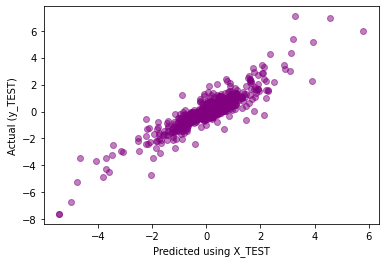

In [63]:

plt.scatter(rf_pred, y_TEST, color='purple', alpha=.5)

plt.xlabel('Predicted using X_TEST')
plt.ylabel('Actual (y_TEST)')

plt.show()

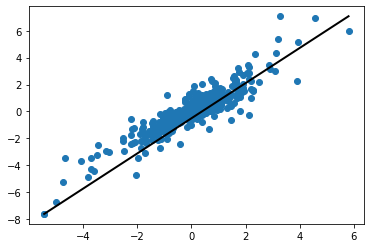

In [64]:
plt.scatter(rf_pred, y_TEST)
plt.plot([rf_pred.min(), rf_pred.max()], [y_TEST.min(), y_TEST.max()], color = 'black', linewidth = 2)




### Top Model Parameters

In [70]:
type(pipelines['rf'])

sklearn.pipeline.Pipeline

In [71]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=200, random_state=123))])

In [72]:
### Actual pctChgSPX versus Prediction
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_TEST, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_TEST, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_TEST, rf_pred)))

Mean Absolute Error: 0.37740544741047133
Mean Squared Error: 0.3157499433436401
Root Mean Squared Error: 0.5619163134699331


In [73]:
# Calculate the absolute errors
errors = abs(rf_pred - y_TEST)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_TEST)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Mean Absolute Error: 0.38 degrees.
Accuracy: -inf %.


Text(0.5, 1.0, 'Actual vs Fitted Values for Price')

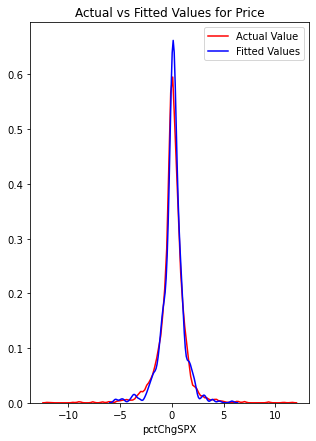

In [74]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

In [ ]:
### These are results without serious tuning, and without any feature selection. Surely we can do better than 